# Elementary Probabilities

In [1]:
%%html
<link rel="stylesheet" type="text/css" href="../styles/styles.css">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from itertools import product, combinations, permutations
from scipy.special import comb, perm
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
import sys
from pathlib import Path

# Add the "resources" directory to the path
project_root = Path().resolve().parent.parent
resources_path = project_root / 'resources'
sys.path.insert(0, str(resources_path))

In [4]:
from elementary_probabilities import (create_probability_scale, rolling_dice, print_classif_example, examples_elementary_prob)

## Learning Objectives

By the end of this session, you will be able to:
- Calculate elementary probability of an event
- Calculate the probability of two events

<div class="alert alert-info">
<h4>🎯 The Autonomous Vehicle Dilemma</h3>
<p><b>Scenario:</b> In 2016, a Tesla autopilot system failed to distinguish between a white truck and a bright sky, resulting in a fatal accident. The AI vision system had never encountered this specific scenario during training.</p>
<p><b>Questions:</b></p>
<ul>
<li>How many possible scenarios must an AI system be prepared for?</li>
<li>Can we mathematically quantify uncertainty in AI decisions?</li>
<li>What's the probability that an AI encounters a completely new situation?</li>
</ul>
<p><b>Your Intuitive Guess:</b> On a scale of 1-10, how confident should an AI be when making life-critical decisions?</p>
<p><i>Promise: By the end of this lesson, you'll understand the mathematical foundation that could prevent such disasters!</i></p>
</div>

## Understanding Probability

Think of the following examples:
- Coin flip (heads): 0.5
<center>
<img src="img/static_coin.svg" alt="Static coin flip" width="300px">
</center>

- Rolling a 6 on fair die: 1/6
<center>
<img src="img/six_dice.svg" alt="Fair dice rolling" width="300px">
</center>

- AI correctly identifying a cat: 0.95
<center>
<img src="img/cat_dog_choice.svg" alt="Cat identification by AI" width="300px">
</center>

- Email being spam: 0.12
<center>
<img src="img/spam_vs_not_spam.svg" alt="Spam identification by AI" width="500px">
</center>

- Autonomous car sensor failure: 0.001
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Handan_Accident.gif/1125px-Handan_Accident.gif" alt="Tesla accident in Handan, Hebei, China, on January 20, 2016, CC BY-SA 4.0" width="500px" title="Source: Wikipedia https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Handan_Accident.gif/1125px-Handan_Accident.gif">
</center>

> What do they have in common?

A result of these events is **uncertain**.

<div class="alert alert-success">
<h4>Intuitive Definition: Probability</h4>

<b>Probability</b> of an event $A$, denoted $P(A)$, is a measure of how likely that event is to occur.

- Range: $0 \leq P(A) \leq 1$
- $P(A) = 0$: Event will never happen
- $P(A) = 1$: Event will always happen
- $P(A) = 0.5$: Event happens half the time
</div>

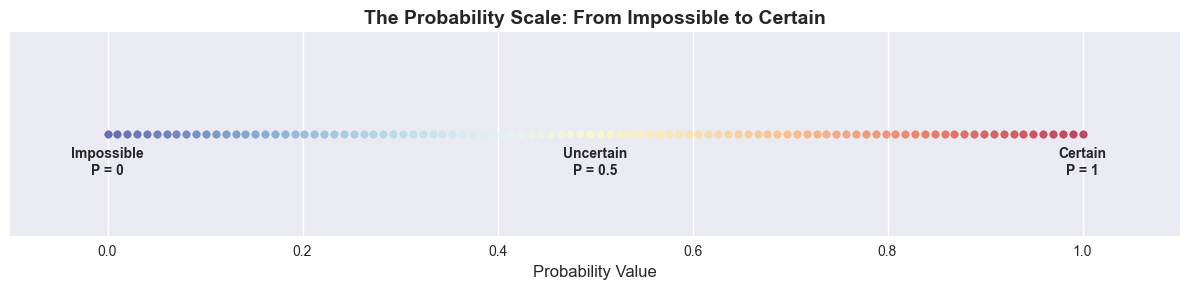

In [5]:
# visualise probability scale
create_probability_scale()

<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight: AI Confidence Scores</h4>
<p>In machine learning, models output <b>confidence scores</b> that are essentially probabilities:</p>
<ul>
<li><b>Image Classification:</b> "89% confident this is a cat"</li>
<li><b>Spam Detection:</b> "12% chance this email is spam"</li>
<li><b>Medical Diagnosis:</b> "95% probability of disease presence"</li>
<li><b>Autonomous Driving:</b> "99.9% sure this is a stop sign"</li>
</ul>
<p><b>Critical Question:</b> How do we ensure these probabilities are calibrated correctly?</p>
</div>

## Sample Spaces and Events

<div class="alert alert-success">
<h4>Formal Definitions</h4>

<b>Random Experiment:</b> A process whose outcome is uncertain and can be repeated under identical conditions.

<b>Sample Space ($\Omega$):</b> The set of all possible outcomes of a random experiment.

<b>Event ($A$):</b> A subset of the sample space - a collection of outcomes we're interested in.

<b>Elementary Event:</b> A single outcome $\{\omega\}$ from the sample space.
</div>

Let's consider several examples.

**Example 1: Rolling a Six-Sided Die**

- Sample space $\Omega = \{1, 2, 3, 4, 5, 6\}$
- Size of sample space: $|\Omega| = \text{\# outcomes} = 6$

We consider the following events:
- $\text{Event A} = \text{`rolling even number'} = \{2, 4, 6\}$
- $\text{Event B} = \text{`rolling odd number'} = \{1, 3, 5\}$
- $\text{Event C} = \text{`rolling ≥ 4'} = \{4, 5, 6\}$

📍 EXAMPLE 1: Rolling a Six-Sided Die
Sample Space Ω = {1, 2, 3, 4, 5, 6}
Size of sample space: |Ω| = 6

Event A = 'rolling even number' = {2, 4, 6}
Event B = 'rolling odd number' = {1, 3, 5}
Event C = 'rolling ≥ 4' = {4, 5, 6}


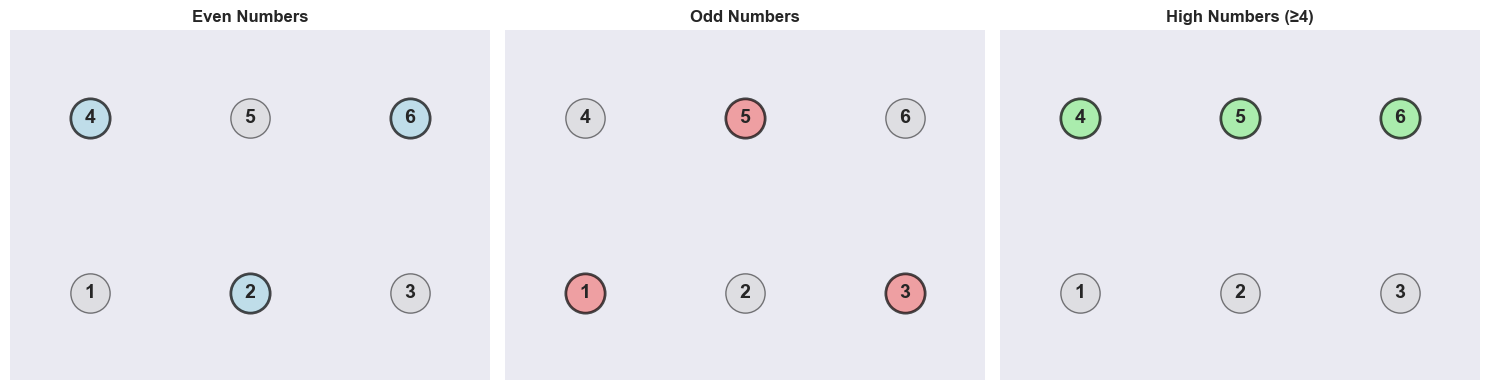

In [6]:
# visualise the example
rolling_dice()

**Example 2: AI Image Classification System**

- Sample space $\Omega = \{'cat', 'dog', 'bird', 'car', 'tree', 'person', 'unknown'\}$
- Size of sample space: $|\Omega| = \text{\# outcomes} = 7$

Consider the following events:
- $\text{Event A} = \text{`animal detected'} = \{'cat', 'dog', 'bird'\}$
- $\text{Event B} = \text{`object detected'} = \{'car', 'tree'\}$
- $\text{Event C} = \text{`classification error'} = \{'unknown'\}$

In [7]:
# print example
print_classif_example()


📍 EXAMPLE 2: AI Image Classification System
Sample Space Ω = {'car', 'cat', 'dog', 'person', 'bird', 'tree', 'unknown'}

Event A = 'animal detected' = {'bird', 'cat', 'dog'}
Event B = 'object detected' = {'car', 'tree'}
Event C = 'classification error' = {'unknown'}


<div class="alert alert-primary">
<h4>🤖 ML Application Spotlight: Cybersecurity Intrusion Detection</h4>
<p><b>Scenario:</b> An AI system monitors network traffic to detect cyber attacks.</p>
<p><b>Sample Space:</b> Ω = {normal_traffic, ddos_attack, malware, phishing, sql_injection, data_breach}</p>
<p><b>Events of Interest:</b></p>
<ul>
<li>A = "Attack detected" = {ddos_attack, malware, phishing, sql_injection, data_breach}</li>
<li>B = "High-severity threat" = {malware, data_breach}</li>
<li>C = "Network overload" = {ddos_attack}</li>
</ul>
<p><b>Business Impact:</b> P(A) helps determine security budget allocation!</p>
</div>

<div class="alert .alert-exercise">
<h4>MINI-EXERCISE</h4>

A federated learning system has 5 client devices: phone, laptop, tablet, IoT sensor, server.

Define the sample space and events for:
1. "Mobile device participates"
2. "High computational power available"

Which devices belong to each event?
</div>

[https://app.wooclap.com/EDPRJU](https://app.wooclap.com/EDPRJU)

<details>
<summary>Reveal solution</summary>

- Sample space: $\Omega = \{phone, laptop, tablet, IoT sensor, server\}$
- Sample size: $|\Omega| = 5$

- $\text{Event A} = \text{"Mobile device participates"} = \{phone, tablet\}, |A| = 2$

*Reasoning*: Mobile devices are those designed for portability. The phone and tablet are mobile, while laptop (though portable, typically considered semi-mobile), IoT sensor (usually stationary/embedded), and server (stationary) don't fit this category. In federated learning literature, "mobile" typically refers to personal mobile devices (phones/tablets).

- $\text{Event B} = \text{"High computational power available"} = \{laptop, server\}, |B| = 2$

*Reasoning*: 
- Server: Highest computational resources (multi-core CPUs, large RAM, GPUs)
- Laptop: Significant compute capability (modern CPUs, 8-32GB RAM)
- Phone/Tablet: Limited compute (mobile processors, 4-8GB RAM typically)
- IoT sensor: Minimal compute (microcontrollers, very limited resources)

</details>

## Elementary Probability of an Event

<div class="alert alert-success">
<h4>Definition: Elementary Probability</h4>

For experiments with <i>equally likely outcomes</i>, the <b>probability</b> of an event $A$ is:

$$P(A) = \frac{\text{\# favorable outcomes}}{\text{\# possible outcomes}} = \frac{|A|}{|\Omega|}$$

</div>

<center>
<img src="img/venn-event-a.png" alt="Venn diagram of Event A" width="400px">
</center>

Examples:

- Rolling a die: $P(\text{rolling a 3}) = 1/6$
- Drawing a card: $P(\text{drawing a heart}) = 13/52 = 1/4$
- Coin flip: $P(heads) = 1/2$

In [8]:
# examples
examples_elementary_prob()


1. Fair Six-Sided Die:
   P(Even) = |{2, 4, 6}| / |Ω| = 3/6 = 0.500
   P(Odd) = |{1, 3, 5}| / |Ω| = 3/6 = 0.500
   P(High (≥4)) = |{4, 5, 6}| / |Ω| = 3/6 = 0.500

   Verification:
   P(Even) + P(Odd) = 0.500 + 0.500 = 1.000
   P(Ω) = 6/6 = 1.000 ✓

2. AI Classification System:
   Performance probabilities:
   P(correct_classification) = 0.920
   P(misclassification) = 0.070
   P(system_error) = 0.010

   Total probability: 1.000 ✓


<div class="alert alert-exercise">
<h4>Calculation Example: Bikes and Scooters</h4>
A bike station has 18 city bikes and 12 electric scooters. If we randomly choose 4 vehicles, what is the probability of having 2 city bikes and 2 scooters?
</div>

<details>
<summary>Reveal solution</summary>
1. Define the event

Let's define the event: $A = ``\text{having 2 bikes and 2 scooters}"$

The total number of vehicles available at the station is: $18 + 12 = 30$.

We are in the case of a finite sample space. So, to calculate the probability of $A$, we can use the ratio: $\mathbb{P}(A) = \frac{\text{\# favorable results}}{\text{\# possible results}}$

2. Calculate possible results

This involves choosing 4 vehicles from 30. How many possible choices?

When order doesn't matter in this case, it's about combinations:

$$C(30, 4) = \begin{pmatrix}30 \\ 4\end{pmatrix} = \frac{30!}{4!(30-4)!} = \frac{30!}{4!26!} = \frac{27\times 28\times 29\times 30}{4\times 3\times 2\times 1} = 27\times 7\times 29\times 5 = 27405$$

3. Calculate favourable results

Now, we'll calculate the number of favorable results based on the fundamental counting principle. For this, we will calculate:

* the number of ways to choose 2 bikes from 18 available: $C(18, 2) = \begin{pmatrix}18 \\ 2\end{pmatrix} =\frac{18!}{2!(18-2)!} = \frac{18!}{2!16!} = \frac{18\times 17}{2\times 1} = 153$
* the number of ways to choose 2 scooters from 12: $C(12,2) = \begin{pmatrix}12 \\ 2\end{pmatrix} =\frac{12!}{2!(12-2)!} = \frac{12!}{2!10!} = \frac{12\times 11}{2\times 1} = 66$

and take their product: $\begin{pmatrix}18 \\ 2\end{pmatrix} \times \begin{pmatrix}12 \\ 2\end{pmatrix} = 153\times 66 = 10098$

4. Calculate probability

Let's return to the probability formula for $A$:

$$\mathbb{P}(A) = \frac{\text{\# favorable results}}{\text{\# possible results}} = \frac{\begin{pmatrix}18 \\ 2\end{pmatrix} \times \begin{pmatrix}12 \\ 2\end{pmatrix}}{\begin{pmatrix}30 \\ 4\end{pmatrix}}= \frac{10098}{27405} \approx 0.368 $$

</details>

In [9]:
# bikes and e-scooter example
total_outcomes = comb(30, 4, exact=True)
print(f"# possible results: {total_outcomes}")
# choose 2 bikes from 18
bikes = comb(18, 2, exact=True)
print(f"# possibilities to choose 2 bikes from 18: {bikes}")
# choose 2 e-scooters from 12
scooters = comb(12, 2, exact=True)
print(f"# possibilities to choose 2 e-scooters from 12: {scooters}")
# calculate favourable results
favourable_outcomes = bikes * scooters
print(f"# favourable results: {favourable_outcomes}")
# calculate probability
prob = favourable_outcomes / total_outcomes
print(f"probability of having 2 city bikes and 2 e-scooters: {prob}")

# possible results: 27405
# possibilities to choose 2 bikes from 18: 153
# possibilities to choose 2 e-scooters from 12: 66
# favourable results: 10098
probability of having 2 city bikes and 2 e-scooters: 0.36847290640394087


### Probability of the Complementary Event

What is the *complementary event* to $A$ or in other words, the *opposite event*? 

<center>
<img src="img/venn-event-complement.png" alt="Venn diagram of the complementary event to A" width="400px">
</center>

Consider an example of rolling a dice.

Let $A = \text{``obtaining an odd result}" = \{1,3,5\}$. Then, $\bar{A} = ``\text{not obtaining an odd result}" = \{2,4,6\}$. 

Let's calculate the probability of $\bar{A}$ by applying the same formula as in the previous case:

$$\mathbb{P}(\bar{A}) = \frac{\text{\# favorable results}}{\text{\# possible results}} = \frac{card(\bar{A})}{card(\Omega)} = \frac{card(\{2,4,6\})}{card(\{1,2,3,4,5,6\})} = \frac{3}{6} = 1/2$$

We can see that:

$$\mathbb{P}(\Omega) = \frac{card(\Omega)}{card(\Omega)} = \mathbb{P}(A) + \mathbb{P}(\bar{A}) = 1$$

<center>
<img src="img/venn-event-and-compliment.png" alt="Venn diagram of the event A and its complementary" width="400px">
</center>

Hence:

<div class="alert alert-success" style='background-color:white'>

$$\mathbb{P}(A) = 1 - \mathbb{P}(\bar{A})$$

</div>

## Probability of Two Events

Now let's consider two events $A\in \mathcal{F}$ and $B\in \mathcal{F}$ in a probability space $(\Omega, \mathcal{F}, \mathbb{P})$. Depending on the relationship between $A$ and $B$, the probability calculation will be done in different ways.

Let's return to the example of rolling a die. As a reminder, $\Omega = \{1,2,3,4,5,6\}$.

### $A$ and $B$

Let $A = ``\text{obtaining an even result}" = \{2,4,6\}$ and $B = ``\text{obtaining a result}\geq 4" = \{4,5,6\}$.
Suppose what we are looking for is the probability of having $A$ **and** $B$ realized.

From a set theory point of view, this is the intersection of $A$ and $B$, $A\cap B = \{\omega|(\omega \in A) \&\& (\omega \in B) \}$ or in the form of a Venn diagram:

<center>
<img src="img/venn-event-intersection.png" alt="Venn diagram of the intersection of events A and B" width="400px">
</center>

$A\cap B = \{2,\mathbf{4},\mathbf{6}\} \cap \{\mathbf{4},5,\mathbf{6}\} = \{4,6\} \neq \emptyset$

Then: $\mathbb{P}(A\cap B) = \frac{card(A\cap B)}{card(\Omega)} = \frac{card(\{4,6\})}{card(\{1,2,3,4,5,6\})} = \frac{2}{6} = \frac{1}{3}$

<div class="alert alert-success" style='background-color:white'>

$$\mathbb{P}(A\cap B) = \frac{card(A\cap B)}{card(\Omega)}$$

</div>

### $A$ or $B$

Now we will be interested in the case of $A$ **or** $B$. Two options are possible:

1. $A$ and $B$ are disjoint, i.e. $A\cap B = \emptyset$
2. $A\cap B \neq \emptyset$

#### Case 1: $\mathbb{P}(A\cup B)$ if $A\cap B = \emptyset$

Let $A = ``\text{obtaining an even result}" = \{2,4,6\}$ and $B = ``\text{obtaining a 3}" = \{3\}$.

Suppose we are looking for the probability of the event "obtaining an even result or a 3". From a set theory point of view, this corresponds to the union of $A$ and $B$, i.e. $A\cup B = \{\omega| (\omega\in A)||(\omega\in B)\}$. Note that in our case $A\cap B = \emptyset$.

In the form of a Venn diagram, the union of $A$ and $B$ where $A\cap B = \emptyset$ is given by:

<center>
<img src="img/venn-event-union-disjoint.png" alt="Venn diagram of the union of disjoint events A and B" width="400px">
</center>

$A\cup B = \{2,4,6\} \cup \{3\} = \{2,3,4,6\}$

Then: $\mathbb{P}(A\cup B) = \frac{card(A\cup B)}{card(\Omega)} = \frac{card(A) + card(B)}{card(\Omega)} = \mathbb{P}(A) + \mathbb{P}(B) = \frac{card(\{2,3,4,6\})}{card(\{1,2,3,4,5,6\})} = \frac{4}{6} = \frac{2}{3}$

<div class="alert alert-success" style='background-color:white'>

If $A\cap B = \emptyset$, then:
$$\mathbb{P}(A\cup B) = \frac{card(A\cup B)}{card(\Omega)} = \frac{card(A) + card(B)}{card(\Omega)} = \mathbb{P}(A) + \mathbb{P}(B)$$


</div>


#### Case 2: $\mathbb{P}(A\cup B)$ if $A\cap B \neq \emptyset$

Let $A = ``\text{obtaining an even result}" = \{2,4,6\}$ and $B = ``\text{obtaining a 3 or a 6}" = \{3, 6\}$.

Note that in this case, $A\cap B = \{6\} \neq \emptyset$.

In terms of a Venn diagram:

<center>
<img src="img/venn-event-union-account-intersection.png" alt="Venn diagram of the union of events A and B" width="400px">
</center>

$A \cup B = \{2,4,6\} \cup \{3,6\} = \{2,3,4,\underbrace{\mathbf{6},\mathbf{6}}_{\text{duplicate!}}\} = \{2,3,4,\mathbf{6}\}$

Note that we keep only one instance of 6 in the resulting set because otherwise we risk having duplicates. In this case, $card(A\cup B)\neq card(A) + card(B)$.

Thus, to avoid counting the elements of the intersection $A\cap B$ twice, we will remove them:
$\mathbb{P}(A\cup B) =\frac{card(A\cup B)}{card(\Omega)}= \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A\cap B) = \frac{3}{6} + \frac{2}{6} - \frac{1}{6} = \frac{4}{6} = \frac{2}{3}$

<div class="alert alert-success" style='background-color:white'>

For $A\in \mathcal{F}$ and $B \in \mathcal{F}$:
$$\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A\cap B)$$

Note that if $A\cap B = \emptyset$, then $\mathbb{P}(A\cap B) = \mathbb{P}(\emptyset) = 0$. Therefore, the expression becomes: $\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A\cap B) = \mathbb{P}(A) + \mathbb{P}(B) - 0 = \mathbb{P}(A) + \mathbb{P}(B)$
</div>

### Union of $n$ events

This property can be generalised for the case of $n$ events.

Note that in the case of multiple events (sets), the intersections of all combinations of sets must be taken into account.

Here is the Venn diagram for the case of three events:

<center>
<img src="img/venn-event-union-n-events.png" alt="Venn diagram of the union of n events" width="400px">
</center>

The formula is then given by:

<div class="alert alert-success" style='background-color:white'>

Let $A_1, A_2, ..., A_n\in \mathcal{F}$:

$$\mathbb{P}\left(\bigcup_{i=1}^n A\right) = \sum_{i=1}^n \mathbb{P}(A_i) - \sum_{(i,j)|1\leq i<j\leq n} \mathbb{P}(A_i\cap A_j) + \sum_{(i,j,k)|1\leq i<j<k\leq n} \mathbb{P}(A_i\cap A_j \cap A_k) + ... + (-1)^{n-1}\mathbb{P}(A_i\cap A_j \cap ... \cap A_n)$$

or

$$\mathbb{P}\left(\bigcup_{i=1}^n A\right) = \sum_{k=1}^n (-1)^{k-1} \sum_{(i_1,...,i_k)|1\leq i_1 <...<i_k\leq n} \mathbb{P}(A_{i_1}\cap ...\cap A_{i_k})$$


</div>


<div class="alert alert-exercise">
<h4>Calculation Example: Rolling a dice twice</h4>

We roll a die twice. The sample space is defined as $\Omega = \{(i,j)\in \mathbb{N}^2, 1\leq i\leq 6, 1\leq j\leq 6\}$, $\mathcal{A} = \mathcal{P}(\Omega)$. What is the probability that the sum of the points is 3 or 4?

</div>

<details>
<summary>Reveal solution</summary>
Let's represent visually what the sum of the two rolls looks like:

|  dice 1\dice 2     | **1** | **2** | **3** | **4** | **5** | **6** |
|-------|-------|-------|-------|-------|-------|-------|
| **1** | 2     | <mark>**3**</mark> | <mark>**4**</mark> | 5     | 6     | 7     |
| **2** | <mark>**3**</mark> | <mark>**4**</mark> | 5     | 6     | 7     | 8     |
| **3** | <mark>**4**</mark> | 5     | 6     | 7     | 8     | 9     |
| **4** | 5     | 6     | 7     | 8     | 9     | 10    |
| **5** | 6     | 7     | 8     | 9     | 10    | 11    |
| **6** | 7     | 8     | 9     | 10    | 11    | 12    |

We note that the total number of possible outcomes is $6 \times 6 = 36$.

Let us break down the overall event $A' = ``\text{the sum of points is either 3 or 4}"$ into two separate events $A$ and $B$ defined as follows:

$$\begin{matrix}
A = ``\text{the sum = 3}" \\
\mathbf{or} \\
B  = ``\text{the sum = 4}"
\end{matrix}$$

We are interested in $A$ or $B$, i.e. $A' = A\cap B$.

Note that $A$ and $B$ are disjoint, i.e. $A\cap B = \emptyset$:

<center>
<img src="img/venn-event-union-disjoint.png" alt="Venn diagram of the union of disjoint events A and B" width="400px">
</center>

Hence, 
$$\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A\cap B) = \mathbb{P}(A) + \mathbb{P}(B) - 0 = \mathbb{P}(A) + \mathbb{P}(B)$$

Therefore, the solution is limited to finding $\mathbb{P}(A)$ and $\mathbb{P}(B)$.

1. $\mathbb{P}(A) = \mathbb{P}(``\text{the sum of points is 3}")$

As we can see in the table above, the event $A$ happens in **two cases**: 
- roll 1 gives 1 and roll 2 gives 2
- roll 1 gives 2 and roll 1 gives 1

Then $\mathbb{P}(A) = \frac{2}{36}$

2. $\mathbb{P}(B) = \mathbb{P}(``\text{the sum of points is 4}")$

As we can see in the table above, the event $B$ happens in **three cases**: 
- roll 1 gives 1 and roll 2 gives 3
- roll 1 gives 3 and roll 1 gives 1
- roll 1 gives 2 and roll 2 gives 2

Then $\mathbb{P}(B) = \frac{3}{36}$

3. Calculate $\mathbb{P}(A\cup B)$

$$\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B) = \frac{2}{36} + \frac{3}{36} = \frac{5}{36}$$

</details>

In [10]:
dice_1 = [1, 2, 3, 4, 5, 6]
dice_2 = [1, 2, 3, 4, 5, 6]
# Create sample space Ω
sample_space = [(i, j) for i in dice_1 for j in dice_2]
print(f"Sample Space Ω has |Ω| = {len(sample_space)} outcomes\n")

# Create sum table using numpy
sum_table = np.array([[i + j for j in dice_2] for i in dice_1])
df = pd.DataFrame(
    sum_table,
    index=dice_1,
    columns=dice_2
)
print(f"Sum Table (Die 1 + Die 2):\n{df}")

# Define the event: sum is 3 or 4
target_sums = [3, 4]
favorable_outcomes = [(i, j) for i, j in sample_space if i + j in target_sums]
# display favourable outcomes
for target_sum in target_sums:
    outcomes = [(i, j) for i, j in favorable_outcomes if i + j == target_sum]
    print(f"Sum = {target_sum}: {outcomes} → {len(outcomes)} outcome(s)")
print(f"\nTotal favourable outcomes: |A| = {len(favorable_outcomes)}")
# Calculate probability
probability = len(favorable_outcomes) / len(sample_space)
print(f"P(sum is 3 or 4) = |A|/|Ω| = {len(favorable_outcomes)}/{len(sample_space)}")
print(f"P(sum is 3 or 4) = {probability:.4f}")
print(f"P(sum is 3 or 4) ≈ {probability*100:.2f}%")

Sample Space Ω has |Ω| = 36 outcomes

Sum Table (Die 1 + Die 2):
   1  2  3   4   5   6
1  2  3  4   5   6   7
2  3  4  5   6   7   8
3  4  5  6   7   8   9
4  5  6  7   8   9  10
5  6  7  8   9  10  11
6  7  8  9  10  11  12
Sum = 3: [(1, 2), (2, 1)] → 2 outcome(s)
Sum = 4: [(1, 3), (2, 2), (3, 1)] → 3 outcome(s)

Total favourable outcomes: |A| = 5
P(sum is 3 or 4) = |A|/|Ω| = 5/36
P(sum is 3 or 4) = 0.1389
P(sum is 3 or 4) ≈ 13.89%


## Probability Measure
<div class="alert alert-danger">
<b>Limitations of the definition of elementary probability:</b>

1. Requires equally likely outcomes: 

What if outcomes aren't equally likely? The counting approach doesn't work here. E.g.: a biased coin with $P(H) = 0.7$, $P(T) = 0.3$, $P(\text{rain tomorrow}) \neq P(\text{no rain})$

2. Only works for finite sample spaces:

What if we are dealing with continuous measurements (e.g. *What's the probability the temperature is exactly 23.5°C?*)? or infinite sequences (e.g. *What's the probability of getting heads eventually in infinite coin flips?*). We cannot "count" outcomes in continuous or infinite spaces.

3. Cannot handle complex events:

What if we are dealing with events in high-dimensional spaces?  
</div>

<div class="alert alert-success">
<h4>Definition: Probability Measure</h4>
<p>A <b>probability measure</b> P is a specific type of measure that quantifies the likelihood of events in a probability space. Let Ω be a sample space (the set of all possible outcomes). A probability measure is a function P that maps from a σ-algebra F of subsets of Ω to the real numbers [0,1]:

$$P : F \rightarrow [0, 1]$$

such that the following three axioms (Kolmogorov axioms) are satisfied:</p>
<ol>
<li><b>Non-negativity:</b> For any event A ∈ F: P(A) ≥ 0</li>
<li><b>Normalisation (Unitarity):</b> The probability of the entire sample space is 1: P(Ω) = 1 (something must happen)</li>
<li><b>Countable Additivity (σ-additivity):</b> For any countable sequence of pairwise disjoint events {A₁, A₂, A₃, ...} ⊆ F (meaning Aᵢ ∩ Aⱼ = ∅ for i ≠ j),

$$P\left(\bigcup_{i=1}^\infty A_i\right) = \sum_{i=1}^\infty P(A_i)$$
</li>
</ol>

The triple (Ω, F, P) is called a <b>probability space</b>, where:

- Ω is the sample space
- F is a σ-algebra of events (subsets of Ω)
- P is the probability measure satisfying the three axioms above

</div>

$\sigma$-algebra can be seen as a collection of "measurable" or "observable" events that we can assign probabilities to. If we can measure certain events, we should also be able to measure:

- Their complements (if we can measure "it rains," we should measure "it doesn't rain")
- Their unions (if we can measure "A happens" and "B happens," we should measure "A or B happens")
- Their countable combinations (infinite sequences of events we can observe)

A $\sigma$-algebra is essentially a closed system of events under these natural operations. It ensures mathematical consistency and prevents paradoxes when assigning probabilities.

Here's an example of $\sigma$-algebra for coin flips.

Let $\Omega = \{H, T\}$ (heads or tails). The power set $\sigma$-algebra is:
$$F = \{\emptyset, \{H\}, \{T\}, \{H, T\}\}$$

We can assign probabilities: $P({H}) = 1/2$, $P({T}) = 1/2$, $P({H,T}) = 1$, $P(∅) = 0$

For continuous $\Omega$: usually F = Borel $\sigma$-algebra (intervals and their combinations).

## Return to Opening Challenge

**Solving the Autonomous Vehicle Dilemma: The Mathematics Behind AI Safety**

1. Sample Space: Define all possible driving scenarios $\Omega = \{highway, city, parking, emergency, ...\}$
2. Event Definition: $A = ``\text{AI encounters unknown scenario"}$
3. Probability Calculation: $P(A) = |\text{untrained scenarios}| / |\text{all possible scenarios}|$
4. Risk Assessment: $P(accident | \text{unknown scenario}) \times P(\text{unknown scenario})$


**Key Insights:**

- The larger the sample space, the higher $P(unknown scenario)$
- AI safety requires minimizing both $P(error)$ and $P(unknown)$
- Probability theory provides the mathematical framework for quantifying AI uncertainty




In [11]:
# Scenario Coverage Analysis
# Simulate driving scenarios
scenario_types = ['highway', 'city_street', 'residential', 'parking', 'emergency', 'weather_adverse', 'construction']
trained_scenarios = {'highway': 10000, 'city_street': 8000, 'residential': 5000, 'parking': 3000}
total_scenarios = 50000

print(f"Training data coverage:")
coverage = {}
for scenario in scenario_types:
    if scenario in trained_scenarios:
        coverage[scenario] = trained_scenarios[scenario] / total_scenarios
        print(f"   {scenario}: {coverage[scenario]:.3f} ({coverage[scenario]*100:.1f}%)")
    else:
        coverage[scenario] = 0.0
        print(f"   {scenario}: {coverage[scenario]:.3f} (UNTRAINED!)")

unknown_prob = 1 - sum(coverage.values())
print(f"\nP(unknown scenario) ≈ {unknown_prob:.3f} ({unknown_prob*100:.1f}%)")
print("⚠️  This is why AI systems need robust uncertainty quantification!")

Training data coverage:
   highway: 0.200 (20.0%)
   city_street: 0.160 (16.0%)
   residential: 0.100 (10.0%)
   parking: 0.060 (6.0%)
   emergency: 0.000 (UNTRAINED!)
   weather_adverse: 0.000 (UNTRAINED!)
   construction: 0.000 (UNTRAINED!)

P(unknown scenario) ≈ 0.480 (48.0%)
⚠️  This is why AI systems need robust uncertainty quantification!


## Key Takeaways

<div class="alert alert-summary">
<h4>🎓 Key Takeaways</h4>
<ol>
<li><b>Probability quantifies uncertainty:</b> Essential for AI decision-making under uncertainty</li>
<li><b>Sample spaces define possibilities:</b> Larger spaces = more potential unknowns</li>
<li><b>Events are what we care about:</b> "Success", "Failure", "Unknown scenario"</li>
<li><b>Probability measures must satisfy axioms:</b> Non-negative, normalized, additive</li>
<li><b>Uniform probability:</b> P(A) = |A| / |Ω| when all outcomes are equally likely</li>
</div>


<div class="alert alert-summary">
<h4>Essential Formulas</h4>
<ul>
<li><b>Basic probability:</b> P(A) = |A| / |Ω| (uniform case)</li>
<li><b>Complement rule:</b> P(A') = 1 - P(A)</li>
<li><b>Union (inclusive or):</b> P(A ∪ B) = P(A) + P(B) - P(A ∩ B)</li>
<li><b>Intersection (and):</b> P(A ∩ B) = probability both occur</li>
<li><b>Probability axioms:</b> P(Ω) = 1, P(A) ≥ 0, P(A ∪ B) = P(A) + P(B) if A ∩ B = ∅</li>
</ul>
</div>